# 1-线性SVM

In [1]:
import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('./data/ex6data1.mat')
print(mat.keys())
print(mat)
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011', '__version__': '1.0', '__globals__': [], 'X': array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [16]:
data[['X2', 'X2']].head()

,X2,X2
0,4.5957,4.5957
1,3.8589,3.8589
2,4.5651,4.5651
3,3.5519,3.5519
4,2.8560,2.8560


# visualize data
pay attention to the edge case at the left hand side

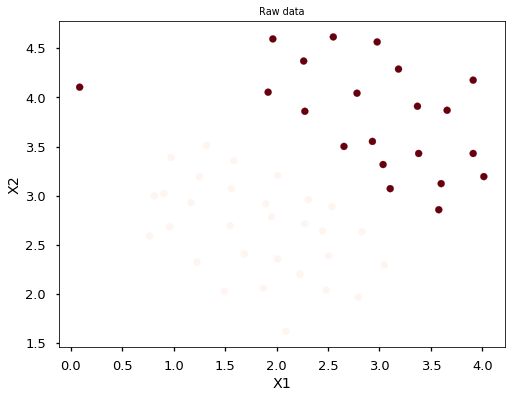

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_context("paper")
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
plt.show()

# try $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [23]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

In [24]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

In [25]:
data.head()

,X1,X2,y,SVM1 Confidence
0,1.9643,4.5957,1,0.804019
1,2.2753,3.8589,1,0.386151
2,2.9781,4.5651,1,1.379442
3,2.9320,3.5519,1,0.524226
4,3.5772,2.8560,1,0.337710


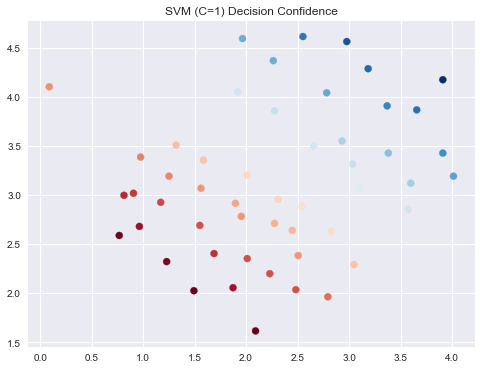

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')
plt.show()

# try $C=100$
with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [7]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

0.90196078431372551

In [8]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

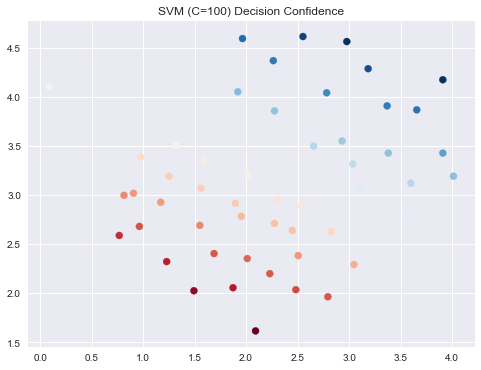

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')
plt.show()

In [10]:
data.head()

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.9643,4.5957,1,0.800003,5.026242
1,2.2753,3.8589,1,0.382517,3.031032
2,2.9781,4.5651,1,1.375121,6.237475
3,2.9320,3.5519,1,0.520583,2.881231
4,3.5772,2.8560,1,0.334315,1.451202
